In [8]:
from mne import Epochs, find_events, set_eeg_reference, read_epochs, viz
from time import time, strftime, gmtime
from collections import OrderedDict
from glob import glob
from collections import OrderedDict
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import read_montage
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'app','utils','jupyter'))
import utils
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
files = ['/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.30.01.csv',
'/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.32.50.csv',
'/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.35.26.csv',
'/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.40.17.csv',
'/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.42.33.csv',
'/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.45.08.csv']
sfreq=256
ch_ind = [0,1,2,3]
stim_ind = 4
replace_ch_names = None
#raw = utils.load_data(standard, replace_ch_names)
raw = utils.load_data(files, replace_ch_names).drop_channels(['Right AUX'])

['/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.30.01.csv', '/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.32.50.csv', '/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.35.26.csv', '/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.40.17.csv', '/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.42.33.csv', '/home/dano/eeg-notebooks/data/visual/N170/subject1/session1/data_2017-09-13-15.45.08.csv']
The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
Creating RawArray with float64 data, n_

/home/dano/BrainWaves/app/utils/jupyter/utils.py:67: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
  sfreq=sfreq, montage=montage)
/home/dano/BrainWaves/app/utils/jupyter/utils.py:67: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
  sfreq=sfreq, montage=montage)
/home/dano/BrainWaves/app/utils/jupyter/utils.py:67: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
  sfreq=sfreq, montage=montage)
/home/dano/BrainWaves/app/utils/jupyter/utils.py:67: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
  sfreq=sfreq, montage=montage)
/home/dano/BrainWaves/app/utils/jupy

The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.


/home/dano/BrainWaves/app/utils/jupyter/utils.py:67: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Right AUX']. Their position has been left untouched.
  sfreq=sfreq, montage=montage)


Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Setting up band-pass filter from 1 - 30 Hz
Effective window size : 8.000 (s)


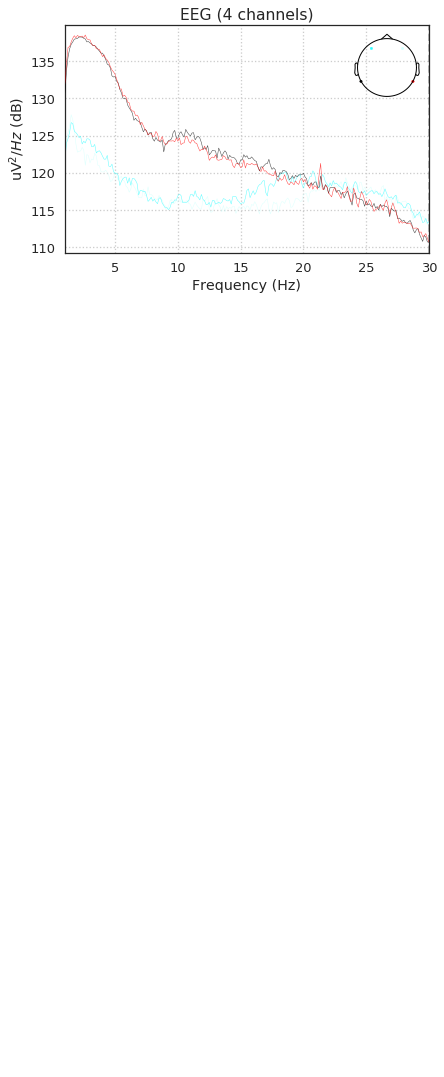

In [4]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

Effective window size : 8.000 (s)


/home/dano/anaconda3/envs/brainwaves/lib/python3.5/site-packages/matplotlib/colors.py:251: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/home/dano/anaconda3/envs/brainwaves/lib/python3.5/site-packages/matplotlib/colors.py:251: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


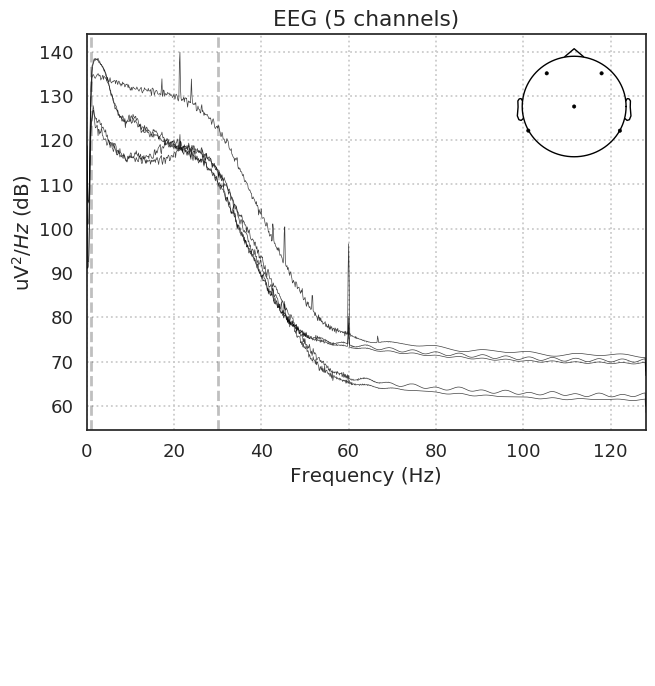

In [47]:
raw.plot_psd()

In [5]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw)
house_id = {'House': 1}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
house_epochs = Epochs(raw, events=events, event_id=house_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 

                verbose=False, picks=[0,1,2,3])
face_id = {'Face': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
face_epochs = Epochs(raw, events=events, event_id=face_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 

                verbose=False, picks=[0,1,2,3])

1174 events found
Event IDs: [1 2]


In [6]:
face_epochs

<Epochs  |   0 events (all good), -0.101562 - 0.800781 sec, baseline off, ~18 kB, data loaded,
 'Face': 0>

In [7]:
face_epochs.plot_image(title="Faces T7",picks=[3])
house_epochs.plot_image(title="Houses T7",picks=[3])

ValueError: zero-size array to reduction operation minimum which has no identity

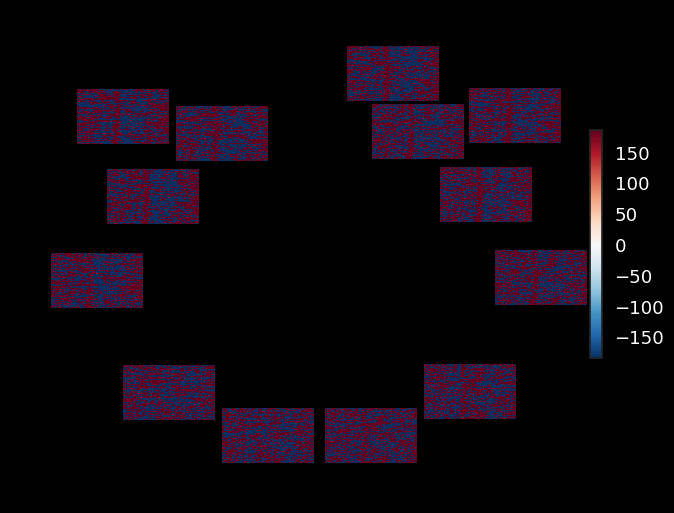

In [102]:
face_epochs.plot_topo_image()

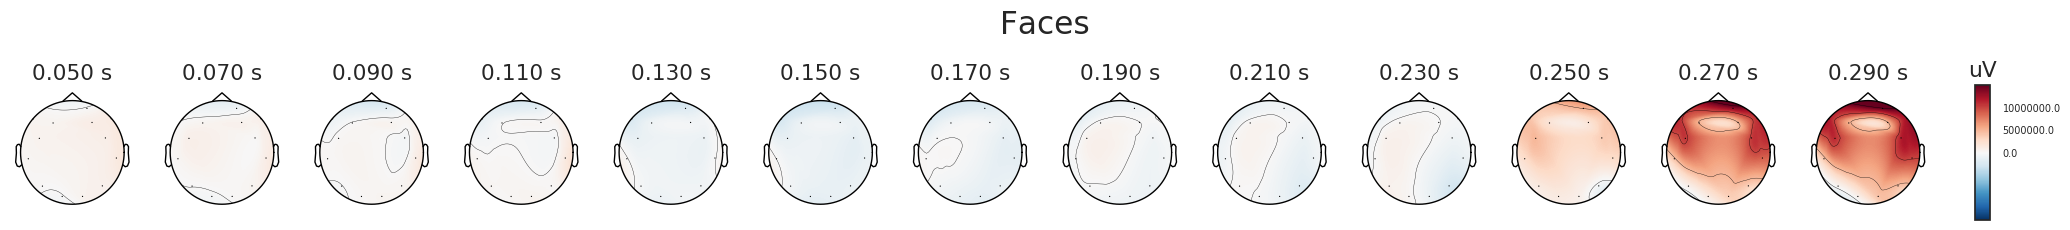

In [69]:
%matplotlib tk
import numpy as np
import matplotlib.pyplot as plt
from mne.datasets import sample
from mne import read_evokeds

house_evoked = house_epochs.average()
face_evoked = face_epochs.average()
# set time instants in seconds (from 50 to 150ms in a step of 10ms)
times = np.arange(0.05, 0.30, 0.02)
# If times is set to None only 10 regularly spaced topographies will be shown

# plot eeg data as topomaps
#evoked.plot_topomap(times, ch_type='eeg', time_unit='s')

# compute a 50 ms bin to stabilize topographies
house_evoked.plot_topomap(times, title='Houses',  ch_type='eeg', average=0.05, time_unit='s')
face_evoked.plot_topomap(times, title='Faces',  ch_type='eeg', average=0.05, time_unit='s')


# plot eeg data as an animation
#house_evoked.animate_topomap(ch_type='eeg', times=times, frame_rate=10,
#                       time_unit='s')
# plot eeg data as an animation
#face_evoked.animate_topomap(ch_type='eeg', times=times, frame_rate=10,
#                       time_unit='s')


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-71-e621e3999a39>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  house_evoked.plot(window_title="House")
<ipython-input-71-e621e3999a39>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  face_evoked.plot(window_title="Face")


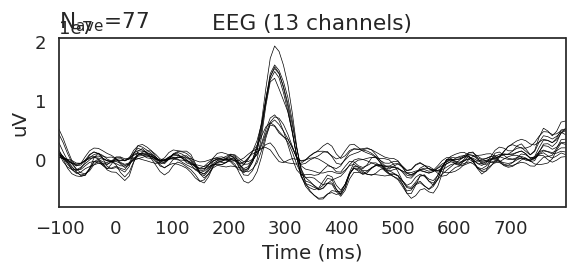

In [71]:
house_evoked.plot(window_title="House")
face_evoked.plot(window_title="Face")

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-76-05ff36021d47>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  house_evoked.plot_image()
<ipython-input-76-05ff36021d47>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  face_evoked.plot_image()


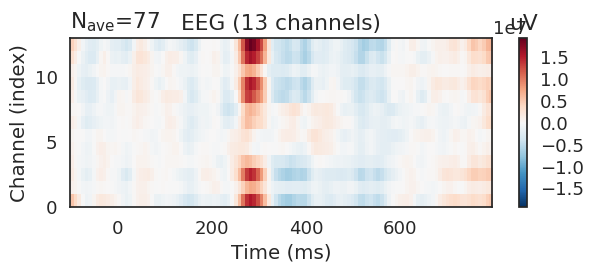

In [76]:
house_evoked.plot_image()
face_evoked.plot_image()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-80-8cfad5bd48bd>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  house_evoked.plot_joint(times="peaks", title="Houses")


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-80-8cfad5bd48bd>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  house_evoked.plot_joint(times="peaks", title="Houses")


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-80-8cfad5bd48bd>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  face_evoked.plot_joint(times="peaks", title="Faces")


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-80-8cfad5bd48bd>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  face_evoked.plot_joint(times="peaks", title="Faces")


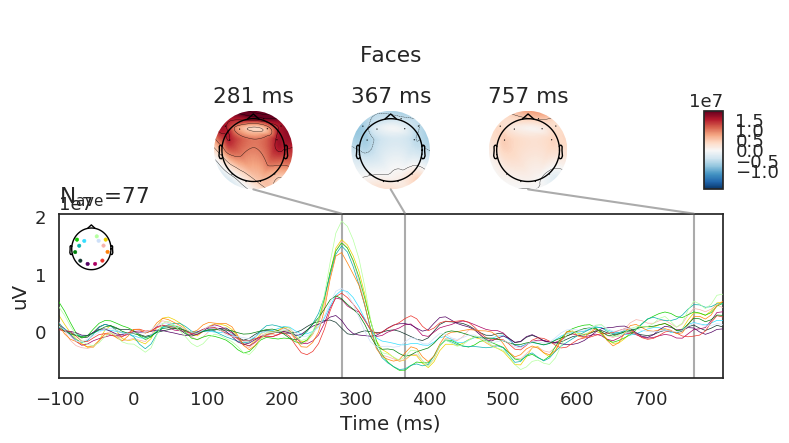

In [80]:
house_evoked.plot_joint(times="peaks", title="Houses")
face_evoked.plot_joint(times="peaks", title="Faces")

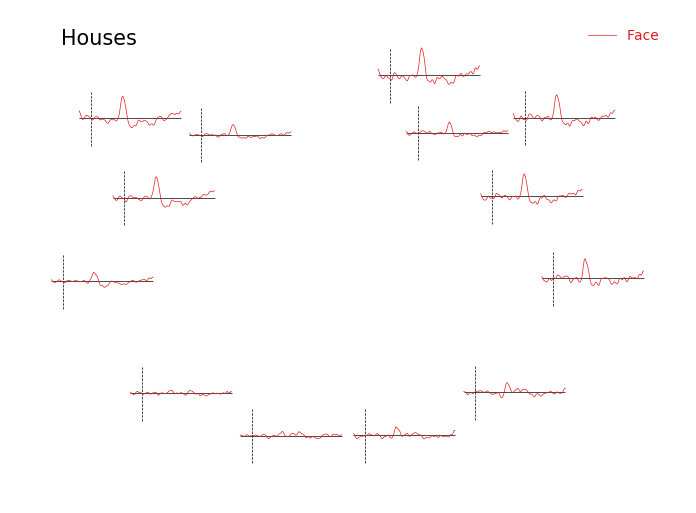

In [87]:
house_evoked.plot_topo(title="Houses")
face_evoked.plot_topo(title="Houses")

TypeError: plot_white() missing 1 required positional argument: 'noise_cov'

In [12]:
%matplotlib
clean_epochs_plot = face_epochs.plot(scalings='auto');
fig = plt.gcf()
fig.canvas.manager.window.activateWindow()
fig.canvas.manager.window.raise_()

Using matplotlib backend: Qt5Agg


IndexError: cannot do a non-empty take from an empty axes.

In [ ]:
## Plot ERPs

# Input
ch_ind = 10

# Computation
conditions = OrderedDict({key: [value] for (key, value) in event_id.items()})

# Output
X, y = utils.plot_conditions(epochs, ch_ind=ch_ind, conditions=conditions, 
                                ci=97.5, n_boot=1000, title='',)

In [ ]:
{'House': 3, 'Face': 4}.items()